# Data
We will use the BCO radiosonde data from the ORCESTRA Campaign in 2024. $141$ radiosondes were launched from the Barbados Cloud Observatory between the September 7th and 29th, 2024. The radiosonde data can be found using the [ORCESTRA Data Browser](https://browser.orcestra-campaign.org/#/ds/ipfs://bafybeibgnsogmdcmrf3msqhmzybmeys4ras3foja3jfnxpozqvfipex66i) and accessed using IPFS.

## Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

## Load Entire Dataset

In [5]:
import xarray as xr

ds = xr.open_dataset("ipfs://bafybeibgnsogmdcmrf3msqhmzybmeys4ras3foja3jfnxpozqvfipex66i", engine="zarr")
ds

<xarray.Dataset> Size: 800MB
Dimensions:      (sonde_id: 1186, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 114MB ...
    lat          (sonde_id, level) float32 57MB ...
    launch_time  (sonde_id) datetime64[ns] 9kB ...
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 57MB ...
  * sonde_id     (sonde_id) <U38 180kB 'INMG_ascent_16.73_-22.94_20240809174'...
Data variables: (12/13)
    alt          (sonde_id, level) float32 57MB ...
    dp           (sonde_id, level) float32 57MB ...
    dz           (sonde_id, level) float32 57MB ...
    height       (sonde_id, level) float32 57MB ...
    launch_lat   (sonde_id) float32 5kB ...
    launch_lon   (sonde_id) float32 5kB ...
    ...           ...
    p            (sonde_id, level) float32 57MB ...
    platform     (sonde_id) <U4 19kB ...
    rh           (sonde_id, level) float32 57MB ...
    ta           (sonde_id, level) float32 57MB ...
    wdir         (sonde_id, level) float32 57MB ...
    wspd         (sonde_id, level) float32 57MB ...
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

## Available Platforms

In [10]:
import numpy as np
np.unique(ds["platform"].values)

array(['BCO', 'INMG', 'RV_'], dtype='<U4')

## Barbados Cloud Observatory
Load BCO radiosonde data during the ORCESTRA Campaign 2024.

The dataset includes both the ascent and descent sounding profiles for the radiosondes and are 276 in total as shown in the following:

In [6]:
ds_bco = ds.where(ds.platform == "BCO", drop=True)
ds_bco

<xarray.Dataset> Size: 186MB
Dimensions:      (sonde_id: 276, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 27MB ...
    lat          (sonde_id, level) float32 13MB ...
    launch_time  (sonde_id) datetime64[ns] 2kB 2024-09-07T01:05:09.939968 ......
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 13MB ...
  * sonde_id     (sonde_id) <U38 42kB 'BCO_ascent_202409070105' ... 'BCO_desc...
Data variables: (12/13)
    alt          (sonde_id, level) float32 13MB -18.0 -10.86 -4.69 ... nan nan
    dp           (sonde_id, level) float32 13MB 296.9 297.5 297.4 ... nan nan
    dz           (sonde_id, level) float32 13MB 0.0 5.623 6.304 ... nan nan nan
    height       (sonde_id, level) float32 13MB 30.62 36.67 42.97 ... nan nan
    launch_lat   (sonde_id) float32 1kB 13.16 13.35 13.16 ... 13.24 13.16 13.31
    launch_lon   (sonde_id) float32 1kB -59.43 -59.48 -59.43 ... -59.43 -59.43
    ...           ...
    p            (sonde_id, level) float32 13MB 1.008e+05 1.008e+05 ... nan nan
    platform     (sonde_id) object 2kB 'BCO' 'BCO' 'BCO' ... 'BCO' 'BCO' 'BCO'
    rh           (sonde_id, level) float32 13MB 0.845 0.882 0.8762 ... nan nan
    ta           (sonde_id, level) float32 13MB 299.8 299.6 299.7 ... nan nan
    wdir         (sonde_id, level) float32 13MB 230.0 227.8 226.6 ... nan nan
    wspd         (sonde_id, level) float32 13MB 3.0 2.349 2.194 ... nan nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

Since both the ascent of the radiosondes and the descents are indexed, we will filter out the descents with the following code to obtain 141 unique launches:

In [7]:
ds_ascent = ds_bco.sel(sonde_id=ds_bco.sonde_id.str.contains('ascent'))
ds_ascent

<xarray.Dataset> Size: 95MB
Dimensions:      (sonde_id: 141, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 14MB ...
    lat          (sonde_id, level) float32 7MB ...
    launch_time  (sonde_id) datetime64[ns] 1kB 2024-09-07T01:05:09.939968 ......
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 7MB ...
  * sonde_id     (sonde_id) <U38 21kB 'BCO_ascent_202409070105' ... 'BCO_asce...
Data variables: (12/13)
    alt          (sonde_id, level) float32 7MB -18.0 -10.86 -4.69 ... nan nan
    dp           (sonde_id, level) float32 7MB 296.9 297.5 297.4 ... nan nan nan
    dz           (sonde_id, level) float32 7MB 0.0 5.623 6.304 ... nan nan nan
    height       (sonde_id, level) float32 7MB 30.62 36.67 42.97 ... nan nan nan
    launch_lat   (sonde_id) float32 564B 13.16 13.16 13.16 ... 13.16 13.16 13.16
    launch_lon   (sonde_id) float32 564B -59.43 -59.43 -59.43 ... -59.43 -59.43
    ...           ...
    p            (sonde_id, level) float32 7MB 1.008e+05 1.008e+05 ... nan nan
    platform     (sonde_id) object 1kB 'BCO' 'BCO' 'BCO' ... 'BCO' 'BCO' 'BCO'
    rh           (sonde_id, level) float32 7MB 0.845 0.882 0.8762 ... nan nan
    ta           (sonde_id, level) float32 7MB 299.8 299.6 299.7 ... nan nan nan
    wdir         (sonde_id, level) float32 7MB 230.0 227.8 226.6 ... nan nan nan
    wspd         (sonde_id, level) float32 7MB 3.0 2.349 2.194 ... nan nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

Now, we consider the launch times. We need to create a dataset with the dates and utilize satellite imagery to identify clear-sky days. For the sake of time, the following video from NWSLakeCharles YouTube channel was used to manually filter out clearsky days during the ORCESTRA Campaign on Barbados: [2024 Atlantic Hurricane Season Satellite](https://www.youtube.com/watch?v=w2MM7BIpqYY&t=627s&pp=ygUoMjAyNCBhdGxhbnRpYyBodXJyaWNhbmUgc2Vhc29uIHNhdGVsbGl0ZQ%3D%3D).

The following script extracts the launch times for every radiosonde launch.

In [5]:
df_launch = ds_ascent['launch_time'].to_series().rename('launch_time').to_frame()
df_launch.set_index('launch_time', inplace=True)
df_launch.index = df_launch.index.floor('s')
df_launch['clear_sky'] = pd.NA
df_launch.to_csv("BCO_Launch_Times.csv")
df_launch

,clear_sky
launch_time,
2024-09-07 01:05:09,<NA>
2024-09-07 10:50:17,<NA>
2024-09-07 17:02:42,<NA>
2024-09-07 22:50:36,<NA>
2024-09-08 04:50:13,<NA>
...,...
2024-09-28 10:50:09,<NA>
2024-09-28 13:49:21,<NA>
2024-09-28 17:03:06,<NA>


## Clear sky launch times df
After manually assigning `True` for clear-sky launch and `False` for non-clearsky, we find that 56 launches were clear-sky and 85 were non-clear-sky.

In [ ]:
df = pd.read_csv("BCO_Launch_Times_Clear_sky.csv", parse_dates=["launch_time"])

df = df[["launch_time", "clear_sky"]]

print(len(df))               # should be ~138
print(df.launch_time.isna().sum())
print(df.clear_sky.value_counts())

141
0
clear_sky
False    85
True     56
Name: count, dtype: int64


C:\Users\cpope\AppData\Local\Temp\ipykernel_39140\1802077183.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("BCO_Launch_Times_Clear_sky.csv", parse_dates=["launch_time"])


So there were 141 radiosonde launches at the BCO. Of those, 56 were clear-sky while 85 were not. This data was saved in `BCO_Launch_Times_Clear_sky.csv`. 

The next cell converts the `true` and `false` values into boolean.

In [9]:
df_flags = pd.read_csv(
    "BCO_Launch_Times_Clear_sky.csv",
    index_col=0,
    parse_dates=True
)

# ensure boolean
df_flags["clear_sky"] = df_flags["clear_sky"].astype(bool)

# Convert to xarray and extract values
is_clear_sky = df_flags.to_xarray()["clear_sky"].values

C:\Users\cpope\AppData\Local\Temp\ipykernel_24324\1500713394.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_flags = pd.read_csv(


In [20]:
is_clear_sky

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Map `clear_sky` onto `sonde_id`

In [10]:
clear_soundings = ds_ascent.isel(sonde_id=is_clear_sky)
clear_soundings

<xarray.Dataset> Size: 38MB
Dimensions:      (sonde_id: 56, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 5MB ...
    lat          (sonde_id, level) float32 3MB ...
    launch_time  (sonde_id) datetime64[ns] 448B 2024-09-07T01:05:09.939968 .....
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 3MB ...
  * sonde_id     (sonde_id) <U38 9kB 'BCO_ascent_202409070105' ... 'BCO_ascen...
Data variables: (12/13)
    alt          (sonde_id, level) float32 3MB -18.0 -10.86 -4.69 ... nan nan
    dp           (sonde_id, level) float32 3MB 296.9 297.5 297.4 ... nan nan nan
    dz           (sonde_id, level) float32 3MB 0.0 5.623 6.304 ... nan nan nan
    height       (sonde_id, level) float32 3MB 30.62 36.67 42.97 ... nan nan nan
    launch_lat   (sonde_id) float32 224B 13.16 13.16 13.16 ... 13.16 13.16 13.16
    launch_lon   (sonde_id) float32 224B -59.43 -59.43 -59.43 ... -59.43 -59.43
    ...           ...
    p            (sonde_id, level) float32 3MB 1.008e+05 1.008e+05 ... nan nan
    platform     (sonde_id) object 448B 'BCO' 'BCO' 'BCO' ... 'BCO' 'BCO' 'BCO'
    rh           (sonde_id, level) float32 3MB 0.845 0.882 0.8762 ... nan nan
    ta           (sonde_id, level) float32 3MB 299.8 299.6 299.7 ... nan nan nan
    wdir         (sonde_id, level) float32 3MB 230.0 227.8 226.6 ... nan nan nan
    wspd         (sonde_id, level) float32 3MB 3.0 2.349 2.194 ... nan nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

In [11]:
cloudy_soundings = ds_ascent.isel(sonde_id=~is_clear_sky)
cloudy_soundings

<xarray.Dataset> Size: 57MB
Dimensions:      (sonde_id: 85, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 8MB ...
    lat          (sonde_id, level) float32 4MB ...
    launch_time  (sonde_id) datetime64[ns] 680B 2024-09-08T10:54:00.262968992...
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 4MB ...
  * sonde_id     (sonde_id) <U38 13kB 'BCO_ascent_202409081054' ... 'BCO_asce...
Data variables: (12/13)
    alt          (sonde_id, level) float32 4MB -18.0 -9.766 -0.8205 ... nan nan
    dp           (sonde_id, level) float32 4MB 298.4 298.7 298.7 ... nan nan nan
    dz           (sonde_id, level) float32 4MB 0.0 7.28 5.995 ... nan nan nan
    height       (sonde_id, level) float32 4MB 30.62 36.76 42.76 ... nan nan nan
    launch_lat   (sonde_id) float32 340B 13.16 13.16 13.16 ... 13.16 13.16 13.16
    launch_lon   (sonde_id) float32 340B -59.43 -59.43 -59.43 ... -59.43 -59.43
    ...           ...
    p            (sonde_id, level) float32 4MB 1.01e+05 1.009e+05 ... nan nan
    platform     (sonde_id) object 680B 'BCO' 'BCO' 'BCO' ... 'BCO' 'BCO' 'BCO'
    rh           (sonde_id, level) float32 4MB 0.856 0.8385 0.8304 ... nan nan
    ta           (sonde_id, level) float32 4MB 301.0 301.7 301.9 ... nan nan nan
    wdir         (sonde_id, level) float32 4MB 100.0 111.0 114.9 ... nan nan nan
    wspd         (sonde_id, level) float32 4MB 1.9 2.169 2.407 ... nan nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

## Add this as a dimension to Xarray dataset

## MetPy Imports

In [12]:
from metpy.plots import SkewT
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units

### Mean Clear Sky sounding plot
The following script plots the mean clear-sky sounding.

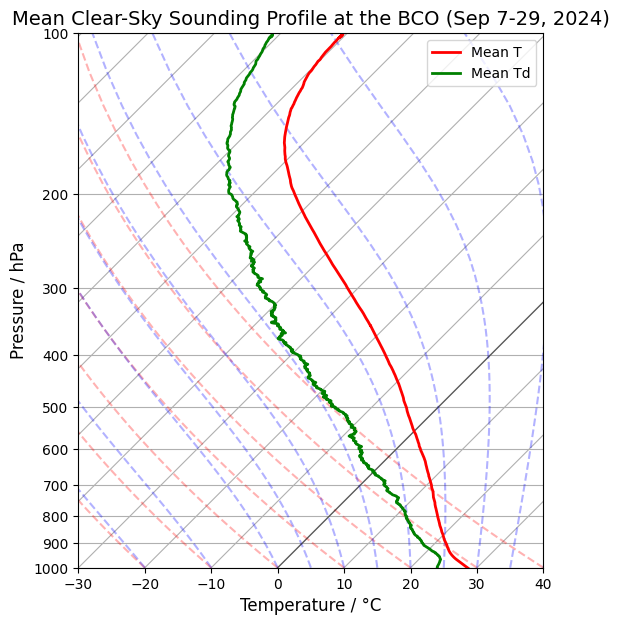

In [11]:
# Mean profiles over all soundings
ta_mean = clear_soundings["ta"].mean(dim="sonde_id") - 273.15
rh_mean = clear_soundings["rh"].mean(dim="sonde_id")
p_mean = clear_soundings["p"].mean(dim="sonde_id") / 100
td_mean = dewpoint_from_relative_humidity((ta_mean + 273.15) * units.kelvin, rh_mean)

# Plot mean T and Td on Skew-T
fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig, rotation=45)

# Zero isotherm
skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)
skew.plot(p_mean, ta_mean, "r", linewidth=2, label="Mean T")
skew.plot(p_mean, td_mean, "g", linewidth=2, label="Mean Td")

skew.ax.set_title("Mean Clear-Sky Sounding Profile at the BCO (Sep 7-29, 2024)", fontsize=14)
skew.ax.set_xlabel("Temperature / °C", fontsize=12)
skew.ax.set_ylabel("Pressure / hPa", fontsize=12)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)

skew.ax.legend()

plt.show()

### Mean Cloudy Sounding
For the sake of comparison, we also plot the mean cloudy sky sounding.

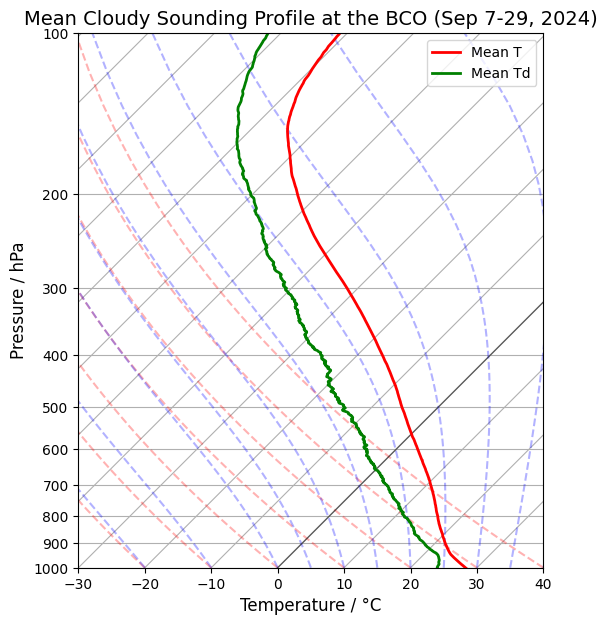

In [10]:
# Mean profiles over all soundings
ta_mean = cloudy_soundings["ta"].mean(dim="sonde_id") - 273.15
rh_mean = cloudy_soundings["rh"].mean(dim="sonde_id")
p_mean = cloudy_soundings["p"].mean(dim="sonde_id") / 100
td_mean = dewpoint_from_relative_humidity((ta_mean + 273.15) * units.kelvin, rh_mean)

# Plot mean T and Td on Skew-T
fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig, rotation=45)

# Zero isotherm
skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)
skew.plot(p_mean, ta_mean, "r", linewidth=2, label="Mean T")
skew.plot(p_mean, td_mean, "g", linewidth=2, label="Mean Td")

skew.ax.set_title("Mean Cloudy Sounding Profile at the BCO (Sep 7-29, 2024)", fontsize=14)
skew.ax.set_xlabel("Temperature / °C", fontsize=12)
skew.ax.set_ylabel("Pressure / hPa", fontsize=12)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)

skew.ax.legend()

plt.show()

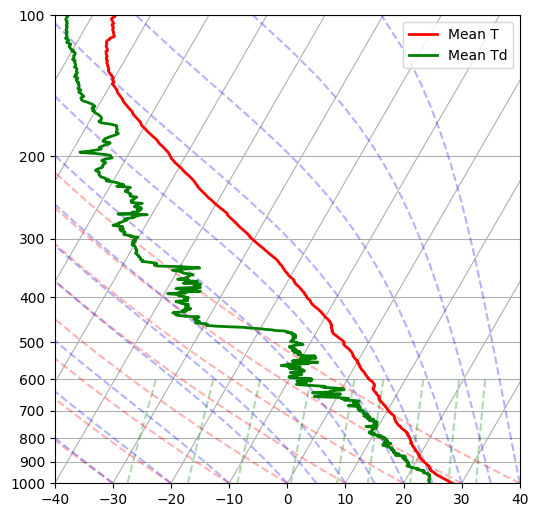

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT

# ============================================================
# SUBSET TO CLEAR-SKY SOUNDINGS
# ============================================================
# ds_clear = ds.sel(sonde_id=clear_sky_mask[clear_sky_mask].index)

# ============================================================
# EXTRACT VARIABLES (RAW NUMBERS)
# ============================================================
T = clear_soundings.ta.values        # K
p = clear_soundings.p.values         # Pa
RH = clear_soundings.rh.values       # % or fraction

# ensure RH is fraction
RH = np.where(RH > 1.0, RH / 100.0, RH)

# ============================================================
# DEWPOINT FROM RELATIVE HUMIDITY (BOLTON 1980)
# ============================================================
# saturation vapor pressure (Pa)
es = 611.2 * np.exp(17.67 * (T - 273.15) / (T - 29.65))

# actual vapor pressure (Pa)
e = RH * es

# dewpoint (°C)
td = 243.5 / (17.67 / np.log(e / 611.2) - 1.0)

# ============================================================
# MEAN PROFILES
# ============================================================
ta_mean = T.mean(axis=0) - 273.15    # °C
td_mean = td.mean(axis=0)            # °C
p_mean  = p.mean(axis=0) / 100.0     # hPa

# ============================================================
# SKEW-T PLOT
# ============================================================
fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

skew.plot(p_mean, ta_mean, "r", linewidth=2, label="Mean T")
skew.plot(p_mean, td_mean, "g", linewidth=2, label="Mean Td")

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)
skew.plot_mixing_lines(alpha=0.3)

skew.ax.legend()
plt.show()


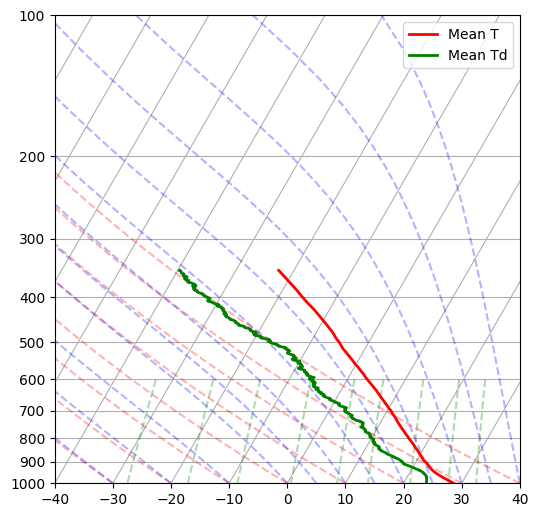

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT

# ============================================================
# SUBSET TO CLEAR-SKY SOUNDINGS
# ============================================================
ds_clear = ds.sel(sonde_id=clear_sky_mask[clear_sky_mask].index)

# ============================================================
# EXTRACT VARIABLES (RAW NUMBERS)
# ============================================================
T = ds_clear.ta.values        # K
p = ds_clear.p.values         # Pa
RH = ds_clear.rh.values       # % or fraction

# ensure RH is fraction
RH = np.where(RH > 1.0, RH / 100.0, RH)

# ============================================================
# DEWPOINT FROM RELATIVE HUMIDITY (BOLTON 1980)
# ============================================================
# saturation vapor pressure (Pa)
es = 611.2 * np.exp(17.67 * (T - 273.15) / (T - 29.65))

# actual vapor pressure (Pa)
e = RH * es

# dewpoint (°C)
td = 243.5 / (17.67 / np.log(e / 611.2) - 1.0)

# ============================================================
# MEAN PROFILES
# ============================================================
ta_mean = T.mean(axis=0) - 273.15    # °C
td_mean = td.mean(axis=0)            # °C
p_mean  = p.mean(axis=0) / 100.0     # hPa

# ============================================================
# SKEW-T PLOT
# ============================================================
fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig)

skew.plot(p_mean, ta_mean, "r", linewidth=2, label="Mean T")
skew.plot(p_mean, td_mean, "g", linewidth=2, label="Mean Td")

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)
skew.plot_mixing_lines(alpha=0.3)

skew.ax.legend()
plt.show()


## Clear-sky sounding plot
The following script creates all clear-sky soundings and saves them into a folder. These soundings will manually be inspected to determine whether they can indeed qualify as clear-sky.

In [12]:
from pathlib import Path
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
import pandas as pd

# Output directory
outdir = Path("clear-sky-soundings")
outdir.mkdir(parents=True, exist_ok=True)

for sid in clear_soundings.sonde_id.values:

    # Select single sounding
    ds = clear_soundings.sel(sonde_id=sid)

    # Extract launch time and format
    launch_time = pd.to_datetime(ds.launch_time.values)
    time_str = launch_time.strftime("%Y-%m-%d %H-%M")

    # Extract variables
    ta = ds["ta"] - 273.15                     # °C
    rh = ds["rh"]
    p = ds["p"] / 100                          # hPa

    td = dewpoint_from_relative_humidity(
        (ta + 273.15) * units.kelvin, rh
    )

    # Create Skew-T
    fig = plt.figure(figsize=(6, 8))
    skew = SkewT(fig, rotation=45)

    # Zero isotherm
    skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)

    # Plot profiles
    skew.plot(p, ta, "r", linewidth=2, label="T")
    skew.plot(p, td, "g", linewidth=2, label="Td")

    # Formatting
    skew.ax.set_title(f"Clear-Sky Sounding\n{time_str}", fontsize=13)
    skew.ax.set_xlabel("Temperature / °C")
    skew.ax.set_ylabel("Pressure / hPa")
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-30, 40)

    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)

    skew.ax.legend()

    # Save figure
    outfile = outdir / f"clear_sky_sounding_{time_str}.png"
    fig.savefig(outfile, dpi=150, bbox_inches="tight")
    plt.close(fig)

## Cloudy Sky Soundings Plots
For completeness, the following script saves the cloudy sky soundings:

In [13]:
from pathlib import Path
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
import pandas as pd

# Output directory
outdir = Path("cloudy-soundings")
outdir.mkdir(parents=True, exist_ok=True)

for sid in cloudy_soundings.sonde_id.values:

    # Select single sounding
    ds = cloudy_soundings.sel(sonde_id=sid)

    # Extract launch time and format
    launch_time = pd.to_datetime(ds.launch_time.values)
    time_str = launch_time.strftime("%Y-%m-%d %H-%M")

    # Extract variables
    ta = ds["ta"] - 273.15                     # °C
    rh = ds["rh"]
    p = ds["p"] / 100                          # hPa

    td = dewpoint_from_relative_humidity(
        (ta + 273.15) * units.kelvin, rh
    )

    # Create Skew-T
    fig = plt.figure(figsize=(6, 8))
    skew = SkewT(fig, rotation=45)

    # Zero isotherm
    skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)

    # Plot profiles
    skew.plot(p, ta, "r", linewidth=2, label="T")
    skew.plot(p, td, "g", linewidth=2, label="Td")

    # Formatting
    skew.ax.set_title(f"Cloudy-Sky Sounding\n{time_str}", fontsize=13)
    skew.ax.set_xlabel("Temperature / °C")
    skew.ax.set_ylabel("Pressure / hPa")
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-30, 40)

    skew.plot_dry_adiabats(alpha=0.3)
    skew.plot_moist_adiabats(alpha=0.3)

    skew.ax.legend()

    # Save figure
    outfile = outdir / f"cloudy_sky_sounding_{time_str}.png"
    fig.savefig(outfile, dpi=150, bbox_inches="tight")
    plt.close(fig)

## Midday Clear Sky Soundings
After manually inspecting the clear-sky soundings, 11 from sounding profiles were selected nearest to midday. The times are listed as follows:

In [ ]:
import pandas as pd

midday_times = pd.to_datetime([
    "2024-09-07 17:02",
    "2024-09-10 16:48",
    "2024-09-11 16:50",
    "2024-09-12 13:47",
    "2024-09-12 16:46",
    "2024-09-13 16:49",
    "2024-09-14 14:02",
    "2024-09-16 13:49",
    "2024-09-20 14:08",
    "2024-09-20 16:49",
    "2024-09-22 14:04",
])

tolerance = pd.Timedelta("10min")

# df = pd.DataFrame(midday_times, columns=["time"])

# df.to_csv("BCO_Clearsky_Times.csv", index=False)


All other clearsky soundings (21) were also found.

In [ ]:
import pandas as pd

midday_times = pd.to_datetime([
    "2024-09-07 17:02",
    "2024-09-07 22:50",
    "2024-09-10 16:48",
    "2024-09-11 16:50",
    "2024-09-11 22:48",
    "2024-09-12 13:47",
    "2024-09-12 16:46",
    "2024-09-12 16:46",
    "2024-09-12 22:49",
    "2024-09-13 16:49", # Not clearsky
    "2024-09-14 14:02",
    "2024-09-15 04:48",
    "2024-09-16 07:49",
    "2024-09-16 10:48",
    "2024-09-16 13:49", # Not clearsky
    "2024-09-20 10:50",
    "2024-09-20 14:08",
    "2024-09-20 16:49",
    "2024-09-22 10:49",
    "2024-09-22 14:04",
    "2024-09-22 16:50",
])

tolerance = pd.Timedelta("10min") # to match launch times better since they are in nano seconds but only accurate to the minute

In [14]:
launch_times = pd.to_datetime(clear_soundings.launch_time.values)

matched_indices = []

for t in midday_times:
    dt = abs(launch_times - t)
    imin = dt.argmin()

    if dt[imin] <= tolerance:
        matched_indices.append(imin)

In [15]:
matched_indices

[np.int64(2),
 np.int64(3),
 np.int64(7),
 np.int64(11),
 np.int64(12),
 np.int64(16),
 np.int64(17),
 np.int64(17),
 np.int64(19),
 np.int64(24),
 np.int64(30),
 np.int64(31),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48)]

In [16]:
midday_soundings = clear_soundings.isel(
    sonde_id=matched_indices
)


In [17]:
midday_soundings

<xarray.Dataset> Size: 14MB
Dimensions:      (sonde_id: 21, level: 12037)
Coordinates:
    flight_time  (sonde_id, level) datetime64[ns] 2MB ...
    lat          (sonde_id, level) float32 1MB ...
    launch_time  (sonde_id) datetime64[ns] 168B 2024-09-07T17:02:42.247016 .....
  * level        (level) int16 24kB 0 1 2 3 4 ... 12032 12033 12034 12035 12036
    lon          (sonde_id, level) float32 1MB ...
  * sonde_id     (sonde_id) <U38 3kB 'BCO_ascent_202409071702' ... 'BCO_ascen...
Data variables: (12/13)
    alt          (sonde_id, level) float32 1MB -18.0 -10.53 -2.696 ... nan nan
    dp           (sonde_id, level) float32 1MB 297.0 298.7 298.0 ... nan nan nan
    dz           (sonde_id, level) float32 1MB 0.0 8.712 6.135 ... nan nan nan
    height       (sonde_id, level) float32 1MB 30.62 37.16 43.29 ... nan nan nan
    launch_lat   (sonde_id) float32 84B 13.16 13.16 13.16 ... 13.16 13.16 13.16
    launch_lon   (sonde_id) float32 84B -59.43 -59.43 -59.43 ... -59.43 -59.43
    ...           ...
    p            (sonde_id, level) float32 1MB 1.008e+05 1.007e+05 ... nan nan
    platform     (sonde_id) object 168B 'BCO' 'BCO' 'BCO' ... 'BCO' 'BCO' 'BCO'
    rh           (sonde_id, level) float32 1MB 0.635 0.7106 0.6897 ... nan nan
    ta           (sonde_id, level) float32 1MB 304.8 304.6 304.4 ... nan nan nan
    wdir         (sonde_id, level) float32 1MB 178.0 173.8 171.1 ... nan nan nan
    wspd         (sonde_id, level) float32 1MB 4.0 2.762 2.341 ... nan nan nan
Attributes:
    creator_email:  marius.winkler@mpimet.mpg.de, marius.rixen@mpimet.mpg.de
    creator_name:   Marius Winkler, Marius Rixen
    featureType:    profile
    history:        Vaisala Sounding System MW41 (2.21.0.7); Quality control ...
    keywords:       ORCESTRA, RAPSODI, Radiosonde Profiles, Sounding, INMG, R...
    license:        CC-BY-4.0
    platform:       INMG, RV Meteor, BCO
    project:        ORCESTRA, PERCUSION, BOW-TIE, PICCOLO, SCORE, MAESTRO
    references:     https://github.com/observingClouds/pysonde
    source:         Radiosondes
    summary:        Vertical atmospheric profile, retrieved from atmospheric ...
    title:          RAPSODI Radiosonde Measurements during ORCESTRA (Level 1)...

## Mean Midday Clear-sky
Finally, the mean midday sounding is plotted from these profiles. Each sounding used to create the profile is also plotted in the background as well.

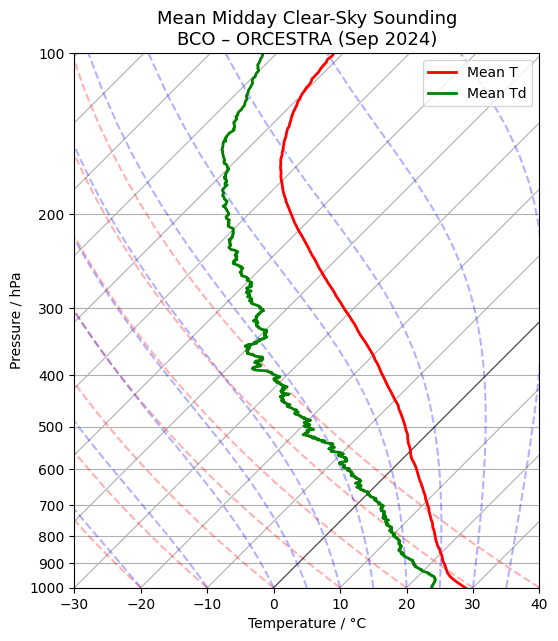

In [18]:
ta_mean = midday_soundings["ta"].mean(dim="sonde_id") - 273.15
rh_mean = midday_soundings["rh"].mean(dim="sonde_id")
p_mean  = midday_soundings["p"].mean(dim="sonde_id") / 100

td_mean = dewpoint_from_relative_humidity(
    (ta_mean + 273.15) * units.kelvin,
    rh_mean
)

fig = plt.figure(figsize=(6, 8))
skew = SkewT(fig, rotation=45)

# Zero isotherm
skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)

# Mean profiles
skew.plot(p_mean, ta_mean, "r", linewidth=2, label="Mean T")
skew.plot(p_mean, td_mean, "g", linewidth=2, label="Mean Td")

# Formatting
skew.ax.set_title(
    "Mean Midday Clear-Sky Sounding\nBCO – ORCESTRA (Sep 2024)",
    fontsize=13
)
skew.ax.set_xlabel("Temperature / °C")
skew.ax.set_ylabel("Pressure / hPa")
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)

skew.ax.legend()
plt.show()

c:\Users\cpope\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


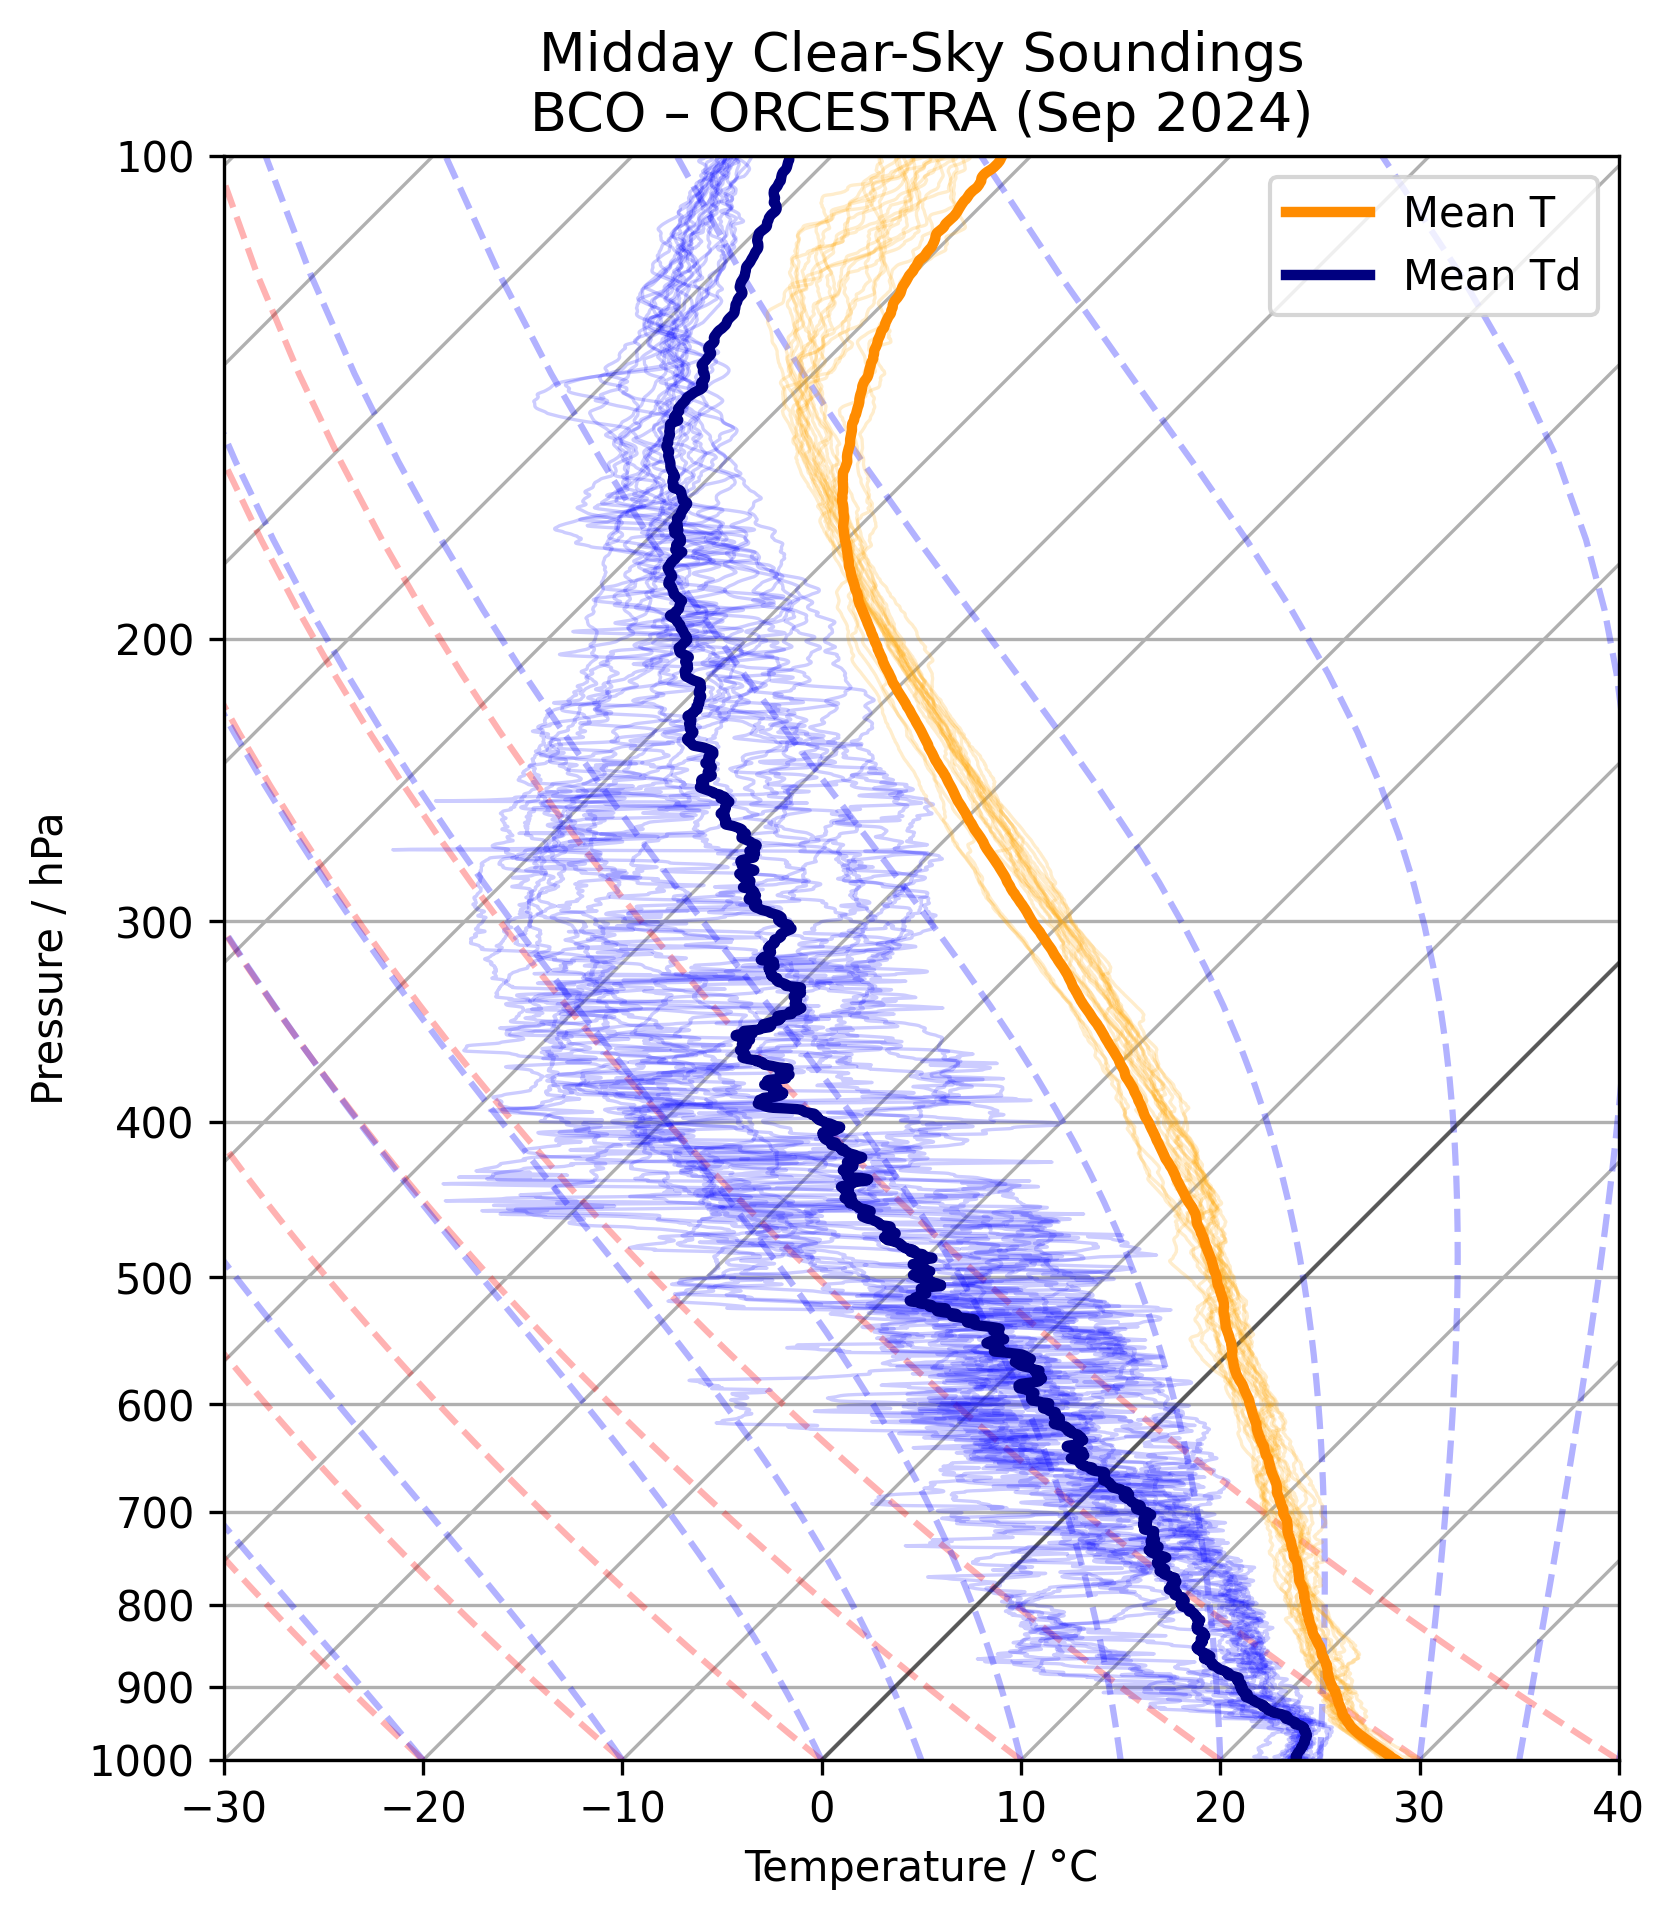

In [22]:
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.plots import SkewT
import matplotlib.pyplot as plt

# --- Mean profiles (unchanged) ---
ta_mean = midday_soundings["ta"].mean(dim="sonde_id") - 273.15
rh_mean = midday_soundings["rh"].mean(dim="sonde_id")
p_mean  = midday_soundings["p"].mean(dim="sonde_id") / 100

td_mean = dewpoint_from_relative_humidity(
    (ta_mean + 273.15) * units.kelvin,
    rh_mean
)

# --- Plot ---
fig = plt.figure(figsize=(6, 8), dpi=300)
skew = SkewT(fig, rotation=45)

# Zero isotherm
skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)

# --- Individual soundings ---
for sid in midday_soundings.sonde_id.values:
    ds = midday_soundings.sel(sonde_id=sid)

    ta = ds["ta"] - 273.15
    rh = ds["rh"]
    p  = ds["p"] / 100

    td = dewpoint_from_relative_humidity(
        (ta + 273.15) * units.kelvin,
        rh
    )

    skew.plot(
        p, ta,
        color="orange",
        linewidth=0.8,
        alpha=0.2
    )

    skew.plot(
        p, td,
        color="blue",
        linewidth=0.8,
        alpha=0.2
    )

# --- Mean profiles (on top) ---
skew.plot(
    p_mean, ta_mean,
    color="darkorange",
    linewidth=2.5,
    label="Mean T"
)

skew.plot(
    p_mean, td_mean,
    color="navy",
    linewidth=2.5,
    label="Mean Td"
)

# --- Formatting ---
skew.ax.set_title(
    "Midday Clear-Sky Soundings\nBCO – ORCESTRA (Sep 2024)",
    fontsize=13
)
skew.ax.set_xlabel("Temperature / °C")
skew.ax.set_ylabel("Pressure / hPa")
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)

skew.ax.legend()
plt.show()


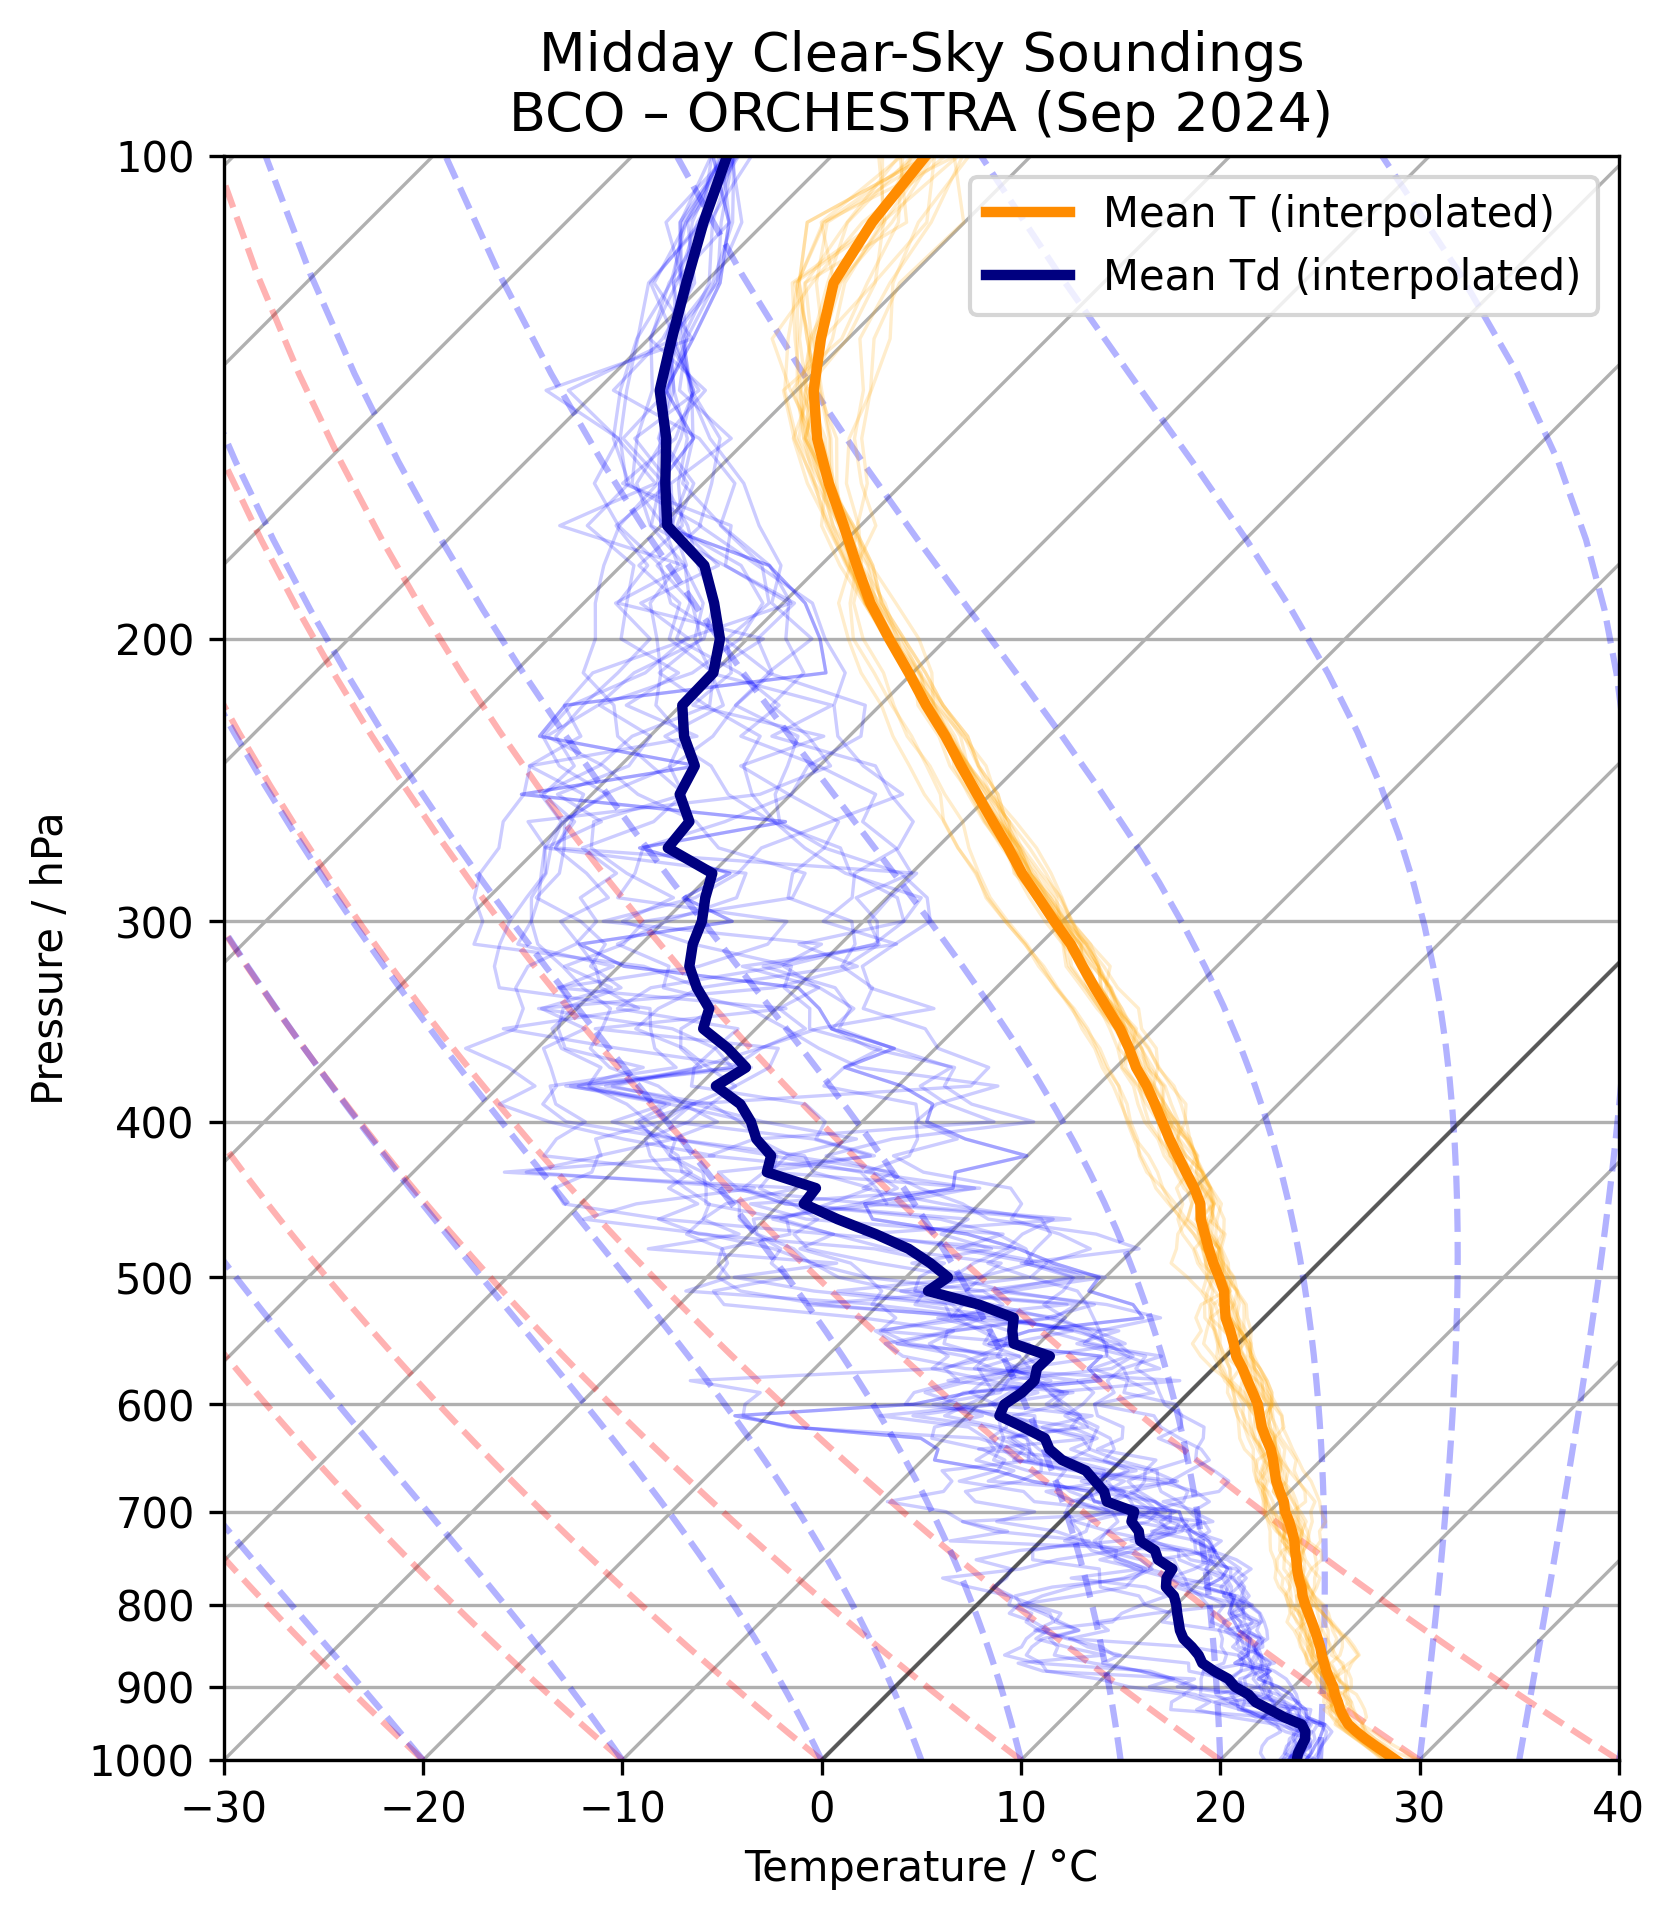

In [23]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from metpy.plots import SkewT

# --- User dataset: midday_soundings (xarray Dataset) ---
# Expect variables: 'ta' (K), 'rh' (dimensionless or percent), 'p' (Pa)
# and coordinate 'sonde_id'. Adjust names if your dataset uses different labels.

# --- Parameters ---
# common pressure grid in hPa (descending for SkewT plotting)
common_p = np.linspace(1000, 100, 91)  # every 10 hPa

ta_interp_list = []
td_interp_list = []
n_levels_available = []

# --- Loop over sondes, compute dewpoint and interpolate to common grid ---
for sid in midday_soundings.sonde_id.values:
    ds = midday_soundings.sel(sonde_id=sid)

    # Extract arrays and convert units
    p = (ds["p"].values / 100.0).astype(float)        # hPa
    ta = (ds["ta"].values - 273.15).astype(float)     # degC
    rh = ds["rh"].values.astype(float)                # could be 0-1 or 0-100

    # Skip sondes with too few valid points
    valid_mask = np.isfinite(p) & np.isfinite(ta) & np.isfinite(rh)
    if np.sum(valid_mask) < 4:
        continue

    p = p[valid_mask]
    ta = ta[valid_mask]
    rh = rh[valid_mask]

    # Ensure RH is dimensionless fraction (0-1) for MetPy
    if np.nanmax(rh) > 1.5:
        rh = rh / 100.0

    # Sort by pressure ascending for interpolation (np.interp expects ascending x)
    sort_idx = np.argsort(p)
    p_asc = p[sort_idx]
    ta_asc = ta[sort_idx]
    rh_asc = rh[sort_idx]

    # Compute dewpoint per sounding using MetPy (input temp in K, rh dimensionless)
    td = dewpoint_from_relative_humidity((ta_asc + 273.15) * units.kelvin,
                                         rh_asc * units.dimensionless).to('degC').magnitude

    # Interpolate to common grid (common_p ascending)
    common_p_asc = common_p[::-1]  # np.interp will use ascending arrays; common_p_asc is ascending
    ta_on_common_asc = np.interp(common_p_asc, p_asc, ta_asc, left=np.nan, right=np.nan)
    td_on_common_asc = np.interp(common_p_asc, p_asc, td, left=np.nan, right=np.nan)

    # Convert back to descending order for plotting convenience
    ta_on_common = ta_on_common_asc[::-1]
    td_on_common = td_on_common_asc[::-1]

    ta_interp_list.append(ta_on_common)
    td_interp_list.append(td_on_common)
    n_levels_available.append(np.isfinite(ta_on_common).sum())

# --- Stack and compute mean (skip NaNs) ---
if len(ta_interp_list) == 0:
    raise RuntimeError("No valid sondes found to average. Check data availability and variable names.")

ta_stack = np.vstack(ta_interp_list)  # shape (n_sondes, n_levels)
td_stack = np.vstack(td_interp_list)

ta_mean_correct = np.nanmean(ta_stack, axis=0)
td_mean_correct = np.nanmean(td_stack, axis=0)

# Optional: mask levels with too few samples (e.g., require at least 50% of sondes)
min_fraction = 0.5
min_count = int(np.ceil(min_fraction * ta_stack.shape[0]))
valid_level_mask = np.sum(np.isfinite(ta_stack), axis=0) >= min_count
ta_mean_correct[~valid_level_mask] = np.nan
td_mean_correct[~valid_level_mask] = np.nan

# --- Plotting (Skew-T) ---
fig = plt.figure(figsize=(6, 8), dpi=300)
skew = SkewT(fig, rotation=45)

# Zero isotherm
skew.ax.axvline(0, color="k", linewidth=1, alpha=0.5)

# Plot individual soundings (interpolated)
for i in range(ta_stack.shape[0]):
    skew.plot(common_p, ta_stack[i, :], color="orange", linewidth=0.8, alpha=0.2)
    skew.plot(common_p, td_stack[i, :], color="blue", linewidth=0.8, alpha=0.2)

# Plot corrected mean profiles on top
skew.plot(common_p, ta_mean_correct, color="darkorange", linewidth=2.5, label="Mean T (interpolated)")
skew.plot(common_p, td_mean_correct, color="navy", linewidth=2.5, label="Mean Td (interpolated)")

# Formatting
skew.ax.set_title("Midday Clear-Sky Soundings\nBCO – ORCHESTRA (Sep 2024)", fontsize=13)
skew.ax.set_xlabel("Temperature / °C")
skew.ax.set_ylabel("Pressure / hPa")
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

skew.plot_dry_adiabats(alpha=0.3)
skew.plot_moist_adiabats(alpha=0.3)

skew.ax.legend()
plt.show()

In [21]:
from pathlib import Path

outdir = Path("exported_datasets")
outdir.mkdir(exist_ok=True)

outfile = outdir / "BCO_midday_clear_sky_soundings_ORCESTRA2.nc"

# Add metadata
midday_soundings.attrs.update({
    "title": "Midday Clear-Sky Radiosonde Soundings at BCO during ORCESTRA",
    "institution": "Barbados Cloud Observatory",
    "campaign": "ORCESTRA",
    "description": (
        "Subset of radiosonde soundings selected by nearest-time matching "
        "within ±10 minutes of predefined midday launch times. "
        "Intended for radiative transfer and surface flux analysis."
    ),
    "history": "Created using xarray; subset and averaged for ORCESTRA radiation study",
    "contact": "Your Name"
})

# Export to NetCDF
midday_soundings.to_netcdf(outfile, mode="w")
midday_soundings.to_netcdf(
    outfile,
    mode="w",
    format="NETCDF4"
)


# ARTS Script
Works on Daniel's laptop but not on mine!

In [11]:
# %%

# Imports
import os

import matplotlib.pyplot as plt
import numpy as np
import pyarts3 as pa
import xarray as xr

# %%

def calc_rcemip_ozone(plev, g1=3.6478, g2=0.83209, g3=11.3515):
    r"""Compute the ozone volumetric mixing ratio from pressure.

    .. math::
        O_3 = g_1 \cdot p^{g_2} e^\frac{-p}{g_3}

    Parameters:
        plev (ndarray): Atmospheric pressure [Pa].
        g1, g2, g3 (float): Fitting parameters for gamma distribution
            according to Wing et al. (2017).

    Returns:
          ndarray: Ozone profile [VMR].

    Reference:
        Wing et al., 2017, Radiative-Convective Equilibrium Model
        Intercomparison Project

    """
    p = plev / 100
    return g1 * p**g2 * np.exp(-p / g3) * 1e-6

class AtmosphericProfile:
    """An atmospheric profile for use with ARTS."""

    def __init__(self, input_data_path: str, sonde_index: int = 0):
        self.sonde_index = sonde_index
        self.input_data_path = input_data_path
        self.atmospheric_profiles = xr.open_dataset(self.input_data_path)

        self.atmospheric_profile = self.atmospheric_profiles.isel(sonde_id=self.sonde_index)
        self.atmospheric_profile_launch_time = None
        self.noon = None
        self.arts_atmospheric_profile = None

        self.rotation_rate = 0.25  # Degrees per minute
        self.solar_longitude = 0

        self.solar = None
        self.thermal = None
        self.altitude = None

        self.solar_down = None
        self.solar_diffuse = None
        self.solar_direct = None

        self.solar_up = None

    def get_launch_time(self):
        """Extracts the launch time of the radiosonde and stores it."""

        atlantic_standard_time = np.timedelta64(4, "h")
        
        self.atmospheric_profile_launch_time = self.atmospheric_profile.launch_time.values - atlantic_standard_time

        self.noon = self.atmospheric_profile_launch_time.astype("datetime64[D]") + np.timedelta64(12, "h")

        return self.atmospheric_profile_launch_time
    
    def calculate_solar_longitude(self):
        """Computes the solar angle using the launch time of the sounding."""

        time_difference = self.atmospheric_profile_launch_time - self.noon

        self.solar_longitude = np.abs( (time_difference / np.timedelta64(1, "m")) * self.rotation_rate)

        return self.solar_longitude

    def create_arts_atmospheric_profile(self):
        """Create atmospheric profile that is ARTS friendly"""

        self.arts_atmospheric_profile = xr.Dataset(
            data_vars={
                "p": (("alt"), self.atmospheric_profile.p.values),
                "t": (("alt"), self.atmospheric_profile.ta.values),
                "H2O": (("alt"), self.atmospheric_profile.mr.values),
                "CO2": ("alt", np.ones_like(self.atmospheric_profile.p.values) * 422 / 1e6),
                "O3": ("alt", calc_rcemip_ozone(self.atmospheric_profile.p.values / 100)),
                "O2": ("alt", np.ones_like(self.atmospheric_profile.p.values) * 0.21),
                "N2": ("alt", np.ones_like(self.atmospheric_profile.p.values) * 0.78)
            },
            coords={
                "alt": self.atmospheric_profile.alt.values,
                "lat": self.atmospheric_profile.launch_lat.values,
                "lon": 0
            }
        )

        self.arts_atmospheric_profile = self.arts_atmospheric_profile.sortby("alt")

        return self.arts_atmospheric_profile

    def calculate_atmospheric_fluxes(self):
        """Uses ARTS to calculate the atmospheric flux profiles."""

        pa.data.download()

        fop = pa.recipe.AtmosphericFlux(
            species=["H2O-161", "O2-66", "N2-44", "CO2-626", "O3-XFIT", "H2O-ForeignContCKDMT400", "H2O-SelfContCKDMT400"],
            remove_lines_percentile={"H2O": 70},
            atmospheric_altitude=self.arts_atmospheric_profile.alt.max(skipna=True).values,
            solar_longitude=self.solar_longitude
        )

        self.solar, self.thermal, self.altitude = fop(atmospheric_profile=self.arts_atmospheric_profile)

        self.solar_down, self.solar_direct, self.solar_diffuse, self.solar_up = self.solar.down[-1], self.solar.direct_down[-1], self.solar.diffuse_down[-1], self.solar.up[-1]

        return self.solar, self.thermal, self.altitude
    
    def plot_atmospheric_solar_down_flux_profile(self):
        """Plots the atmospheric solar down flux profile"""

        fig, ax = plt.subplots(figsize=(8, 12))

        flux_profile = ax.plot(self.solar.down, self.altitude / 1e3)

        ax.set(
            title="Profile of Downward Shortwave Flux",
            xlabel="Flux $Wm^{-2}$",
            ylabel="Altitude [km]"
        )

        # Remove top/right spines and move bottom/left outward
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_position(('outward', 5))
        ax.spines['bottom'].set_position(('outward', 5))

        return flux_profile

        

# %%
filepath = "BCO_midday_clear_sky_soundings_ORCESTRA2.nc"

# %%
# Create list of profiles, their launch times, and the surface atmospheric fluxes
profiles = list(range(0, 21, 1))

profile_launch_time_list = []
sun_longitude_list = []
solar_down_flux_profile_list = []
surface_down_atmospheric_flux_list = []
surface_up_atmospheric_flux_list = []
altitude_list = []

# Extract surface radiation fluxes of shortwave down radiation.
for profile in profiles:
    atmospheric_profile = AtmosphericProfile(filepath, sonde_index=profile)
    atmospheric_profile.get_launch_time()
    profile_launch_time_list.append(atmospheric_profile.atmospheric_profile_launch_time)
    atmospheric_profile.calculate_solar_longitude()
    sun_longitude_list.append(atmospheric_profile.solar_longitude)
    atmospheric_profile.create_arts_atmospheric_profile()
    atmospheric_profile.calculate_atmospheric_fluxes()
    altitude_list.append(atmospheric_profile.altitude)
    solar_down_flux_profile_list.append(atmospheric_profile.solar.down)
    surface_down_atmospheric_flux_list.append(atmospheric_profile.solar_down)
    surface_up_atmospheric_flux_list.append(atmospheric_profile.solar_up)

    # FOR THE TIME BEING, NEGATIVE SUN ANGLES BREAK ARTS
    if atmospheric_profile.solar_longitude >= 0:
        atmospheric_profile.create_arts_atmospheric_profile()
        atmospheric_profile.calculate_atmospheric_fluxes()

        altitude_list.append(atmospheric_profile.altitude)
        solar_down_flux_profile_list.append(atmospheric_profile.solar.down)
        surface_down_atmospheric_flux_list.append(atmospheric_profile.solar_down)
        surface_up_atmospheric_flux_list.append(atmospheric_profile.solar_up)


print(
    f"{profile_launch_time_list}\n\n{sun_longitude_list}\n\n{surface_down_atmospheric_flux_list}\n\n{surface_up_atmospheric_flux_list}"
)

# %%
# print(len(profile_launch_time_list))

# Plot surface fluxes against time.
# fig, ax = plt.subplots(figsize=(16, 8))

# ax.plot(profile_launch_time_list, surface_down_atmospheric_flux_list, label="Downward Shortwave Flux")

# %%
# Plot flux profiles of all radiosondes
fig1, ax1 = plt.subplots(figsize=(7, 10))

for i in range(0, len(solar_down_flux_profile_list), 1):
    ax1.plot(solar_down_flux_profile_list[i], altitude_list[i] / 1e3)

    ax1.set(
        title="Profiles of Global Solar Radiation",
        xlabel="Downward Solar Flux W/m$^2$",
        ylabel="Altitude (km)".title()
    )

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_position(('outward', 5))
    ax1.spines['bottom'].set_position(('outward', 5))

plt.show()

# %%

TypeError: update(): incompatible function arguments. The following argument types are supported:
    1. update(self, data: collections.abc.Mapping[pyarts3.arts.AtmKey | pyarts3.arts.SpeciesEnum | pyarts3.arts.SpeciesIsotope | pyarts3.arts.QuantumLevelIdentifier | pyarts3.arts.ScatteringSpeciesProperty, pyarts3.arts.Vector]) -> None

Invoked with types: pyarts3.arts.ArrayOfAtmPoint, xarray.core.dataset.Dataset